In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2
import os

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from sklearn import preprocessing

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [3]:
train_data = []
target_data = []
dataset_path = "./dataset/train"
cat = os.listdir(dataset_path)
for c in cat:
    print(c)
    cat_path = os.path.join(dataset_path, c)
    filenames = os.listdir(cat_path)
    for f in filenames:
        image_path = cat_path + '/'+ f
        # Gray
        image = cv2.imread(image_path)
        image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_CUBIC)
        image = image.reshape(256, 256, 3)
#         image = image.astype("float32")
        train_data.append(image)
        target_data.append(c)
        

office
opencountry
forest
insidecity
bedroom
livingroom
suburb
tallbuilding
coast
mountain
kitchen
street
highway


In [4]:
le = preprocessing.LabelEncoder()
le.fit(target_data)
target_data = le.transform(target_data)
x_train, x_val, y_train, y_val = train_test_split(
    train_data, target_data, test_size=0)

In [5]:

y_train = to_categorical(y_train, num_classes=13)
y_val = to_categorical(y_val, num_classes=13)

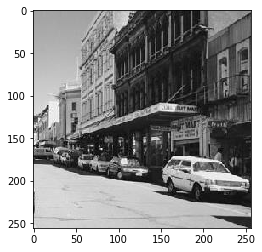

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'tallbuilding'

In [6]:
# print(train_data[0])
show_image = x_train[200].reshape(256, 256, 3)
plt.imshow(show_image)
plt.show()
print(y_train[200])
# print(show_image)
le.inverse_transform(12)
# len(x_val)

In [7]:
x_train = np.array(x_train)
x_val = np.array(x_val)

In [18]:
#coding=utf-8
# Resnet 50
from keras.models import clone_model
from keras.models import Model
from keras.layers import Input,Dense,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,ZeroPadding2D,GlobalAveragePooling2D
from keras.layers import add,Flatten
#from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
from keras.optimizers import SGD
import numpy as np
seed = 7
np.random.seed(seed)
 
def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
 
def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)
        x = add([x,shortcut])
        return x
    else:
        x = add([x,inpt])
        return x

inpt = Input(shape=(256,256,3))
x = ZeroPadding2D((3,3))(inpt)
x = Conv2d_BN(x,nb_filter=64,kernel_size=(7,7),strides=(2,2),padding='valid')
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
 
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = AveragePooling2D(pool_size=(7,7))(x)
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dropout(0.3)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
# x = Dense(500,activation='relu')(x)
x = Dense(13,activation='softmax')(x)
 
model = Model(inputs=inpt,outputs=x)
sgd = SGD(decay=0.0001,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()

model_arr = []
model_count = 1
for i in range(model_count):
    print(i)
    model_tmp = clone_model(model)
    model_tmp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model_arr.append(model_tmp)

# model_1 = clone_model(model)
# model_1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
# model_2 = clone_model(model)
# model_2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
# model_3 = clone_model(model)
# model_3.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 262, 262, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_107 (Conv2D)             (None, 128, 128, 64) 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
batch_normalization_107 (BatchN (None, 128, 128, 64) 256         conv2d_107[0][0]                 
____________________________________________________________________________________________

In [13]:

from keras.models import clone_model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Dropout,Flatten ,GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.optimizers import SGD

model_vgg = ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
# for layer in model_vgg.layers:
#     layer.trainable = False
# model = Flatten(name='flatten')(model_vgg.output)
model = GlobalAveragePooling2D()(model_vgg.output)
model = Dense(512, activation='relu', name='fc1')(model)
model = Dense(128, activation='relu', name='fc2')(model)
model = Dropout(0.5)(model)
model = Dense(13, activation='softmax')(model)
model = Model(inputs=model_vgg.input, outputs=model, name='vgg16')
model.summary()
sgd = SGD(momentum=0.9)
model_arr = []
model_count = 1
for i in range(model_count):
    print(i)
    model_tmp = clone_model(model)
    model_tmp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model_arr.append(model_tmp)

Model: "vgg16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 0)

In [19]:
len(model_arr)

1

In [20]:

# from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet import preprocess_input
x_train_ = preprocess_input(x_train)
# x_val = preprocess_input(x_val)

In [23]:
hist = []
nb_epoch = 5
# model_count = 25
for i in range(model_count):
    hist_tmp = model_arr[i].fit_generator(datagen.flow(x_train_, y_train, batch_size=64),
                           steps_per_epoch=500,
                           epochs=nb_epoch, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           ) #For speed
    hist.append(hist_tmp)

Epoch 1/5
500/500 [==============================] - 421s 842ms/step - loss: 0.0922 - acc: 0.9744
Epoch 2/5
500/500 [==============================] - 414s 829ms/step - loss: 0.0732 - acc: 0.9781
Epoch 3/5
500/500 [==============================] - 406s 811ms/step - loss: 0.0541 - acc: 0.9854
Epoch 4/5
500/500 [==============================] - 416s 833ms/step - loss: 0.0623 - acc: 0.9839
Epoch 5/5
500/500 [==============================] - 411s 821ms/step - loss: 0.0922 - acc: 0.9759


In [ ]:
final_loss, final_acc = model_1.evaluate(x_val, y_val, verbose=0)
print("model 1 :Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))
final_loss, final_acc = model_2.evaluate(x_val, y_val, verbose=0)
print("model 2 :Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))
final_loss, final_acc = model_3.evaluate(x_val, y_val, verbose=0)
print("model 2 :Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

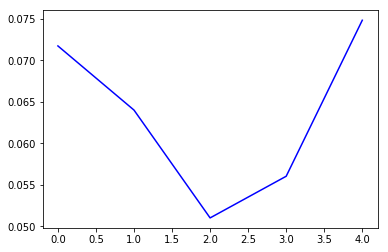

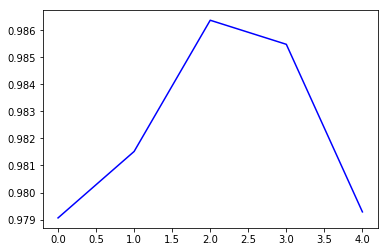

In [24]:
plt.plot(hist[0].history['loss'], color='b')
# plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist[0].history['acc'], color='b')
# plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [25]:
y_hat = model[0].predict(x_train_)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

TypeError: 'Model' object does not support indexing

In [26]:
test_data = []
id_data = []
dataset_path = "./dataset/test"
filenames = os.listdir(dataset_path)
filenames.sort()
# print(filenames)
for f in filenames:
    image_path = dataset_path + '/'+ f
    # Gray
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_CUBIC)
    image = image.reshape(256, 256, 3)
#     image = image.astype("float32")/255.
    id_data.append(f[0:-4])
    test_data.append(image)
test_data = np.array(test_data)
# x_test = mnist_testset.astype("float32")
# x_test = x_test.reshape(-1, 200, 200, 1)/255.

In [27]:
y_pred_list = []
test_data_ = preprocess_input(test_data)
for i in range(model_count):
    y_hat_tmp = model_arr[i].predict(test_data_, batch_size=64)
    y_pred_tmp = le.inverse_transform(np.argmax(y_hat_tmp,axis=1))
    y_pred_list.append(y_pred_tmp)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
y_pred = []
from collections import Counter
for i in range(len(test_data)):
    pred = []
    for j in range(model_count):
        pred.append(y_pred_list[j][i])
    pred_count = Counter(pred)
    top_one = pred_count.most_common(1)
#     print(top_one[0][0])
    y_pred.append(top_one[0][0])

In [29]:
import csv

with open(str(model_count) + '_voting_resnet.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'label'])
    for i in range(len(y_pred)) :
        writer.writerow([id_data[i], str(y_pred[i])])

In [ ]:
os.environ['HDF5_USE_FILE_LOCKING']='FALSE'
h5_output = str(hist.history['acc'][19]) + '.h5' 
model.save(h5_output)